<a href="https://colab.research.google.com/github/pedrohortencio/machine-learning-gladiator/blob/main/Fashion%20MNIST/Fashion_MNIST_Gladiator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
import numpy as np                  
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras.applications import VGG16    # model that will be used for transfer learning

sns.set_theme() # set theme parameters. Using the defaults.

In [ ]:
# Creates a dictionary that'll be used to keep the accuracy values in validation and test datasets.
dict_acc = {}

## Downloading and splitting dataset 

In [ ]:
# Download the data
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


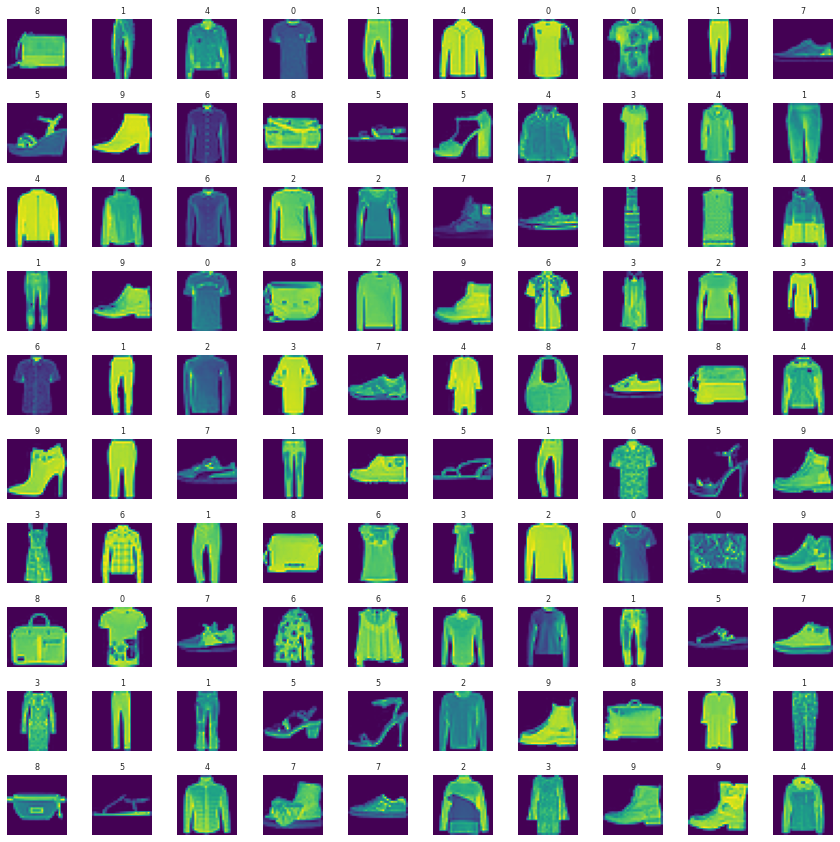

In [ ]:
# Defining length and width
W_grid = 10
L_grid = 10

# Creating the subplot
fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))
fig.patch.set_facecolor('whitesmoke')   # set the background color to a white-ish color

axes = axes.ravel() # flattening the axes array to a 2D array
n_training = len(X_train) 

# plot the individual images
for i in np.arange(0, W_grid * L_grid):

    index = np.random.randint(0, n_training)    # generating a random integer number (an index)
    axes[i].imshow(X_train[index], cmap='viridis')  # plotting the image in the generated index
    axes[i].set_title(y_train[index], fontsize = 8) # adding the label
    axes[i].axis('off') # removing the axis

plt.subplots_adjust(hspace=0.4) # adjusting the space between the plots

In [ ]:
# Creating a validation set that will be used in the training time 
(X_train, X_validation,
 y_train, y_validation) = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [ ]:
print("Train dataset")
print(X_train.shape)
print(y_train.shape)
print("Validation dataset")
print(X_validation.shape)
print(y_validation.shape)
print("Test dataset")
print(X_test.shape)
print(y_test.shape)

Train dataset
(54000, 28, 28)
(54000,)
Validation dataset
(6000, 28, 28)
(6000,)
Test dataset
(10000, 28, 28)
(10000,)


In [ ]:
# Reshapes the data to a (28, 28, 1) format
X_train = X_train.reshape(len(X_train), 28, 28, 1)
X_validation = X_validation.reshape(len(X_validation), 28, 28, 1)
X_test = X_test.reshape(len(X_test), 28, 28, 1)

# Transforming all values to a 0-1 interval
X_train = X_train / 255
X_validation = X_validation / 255
X_test = X_test / 255

## Models

###Deep Neural Network

The first model to be created is a Deep Neural Network (DNN).

In [ ]:
# 5 layers with dropout and regularization (both L1 and L2)
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1.5e-5, l2=1e-4)),
                                    tf.keras.layers.Dropout(0.5),

                                    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1.5e-5, l2=1e-4)),
                                    tf.keras.layers.Dropout(0.4),
                                    
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1.0e-5, l2=1e-4)),
                                    tf.keras.layers.Dropout(0.3), 
                                    
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1.0e-5, l2=0.5e-4)), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
# The training will be done until the validation loss don't increase in 5 epochs.
loss_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# Using a small learning rate to slow down the training.
# The sparse categorical crossentropy was used because the labels aren't one-hot encoded
model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.0005),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# The training will have a validation step in each epoch, using the validation data created early
dnn_history = model.fit(X_train, y_train, batch_size = 250, epochs=100, callbacks=loss_callback, validation_data=(X_validation, y_validation))

Epoch 1/100
216/216 [==============================] - 1s 4ms/step - loss: 1.8074 - accuracy: 0.4050 - val_loss: 0.7801 - val_accuracy: 0.7763
Epoch 2/100
216/216 [==============================] - 1s 3ms/step - loss: 0.8852 - accuracy: 0.7516 - val_loss: 0.6594 - val_accuracy: 0.8290
Epoch 3/100
216/216 [==============================] - 1s 4ms/step - loss: 0.7593 - accuracy: 0.7933 - val_loss: 0.6018 - val_accuracy: 0.8492
Epoch 4/100
216/216 [==============================] - 1s 3ms/step - loss: 0.6927 - accuracy: 0.8186 - val_loss: 0.5710 - val_accuracy: 0.8578
Epoch 5/100
216/216 [==============================] - 1s 4ms/step - loss: 0.6546 - accuracy: 0.8306 - val_loss: 0.5538 - val_accuracy: 0.8597
Epoch 6/100
216/216 [==============================] - 1s 3ms/step - loss: 0.6239 - accuracy: 0.8383 - val_loss: 0.5289 - val_accuracy: 0.8665
Epoch 7/100
216/216 [==============================] - 1s 3ms/step - loss: 0.6072 - accuracy: 0.8409 - val_loss: 0.5212 - val_accuracy: 0.8670

In [ ]:
# saving the predictions on test data (the the network never saw)
dnn_stats = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4403 - accuracy: 0.8839


In [ ]:
test_acc = dnn_stats[-1]    # the last value in the list is the accuracy on test 
validation_acc = dnn_history.history['val_accuracy'][-1]    # the last value is the validation accuracy on the last epoch

dict_acc['DNN'] = [validation_acc, test_acc]    # adding those values in the dictionary

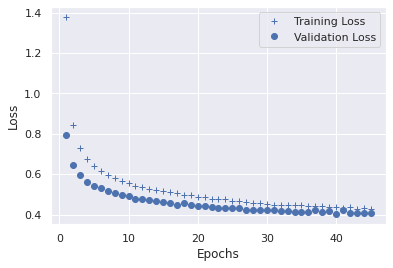

In [ ]:
epochs = range(1, len(dnn_history.history['loss'])+1)   # creating a list of number from 1 to number_of_epochs
training_loss = dnn_history.history['loss']     # takes only the training loss values from the history 
validation_loss = dnn_history.history['val_loss']   # takes the validation loss values from the history


# b+ is for "blue cross"
plt.plot(epochs, training_loss, 'b+', label='Training Loss')    # plots the training loss
# "bo" is for "blue dot"
plt.plot(epochs, validation_loss, 'bo', label='Validation Loss')    # plots the validation loss
plt.xlabel('Epochs')    # adds X label
plt.ylabel('Loss')      # adds Y labels
plt.legend()    # adds legend

plt.show()  # display the plot

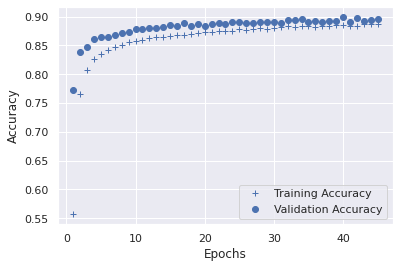

In [ ]:
epochs = range(1, len(dnn_history.history['loss'])+1)
training_acc = dnn_history.history['accuracy']
validation_acc = dnn_history.history['val_accuracy']


# b+ is for "blue cross"
plt.plot(epochs, training_acc, 'b+', label='Training Accuracy')
# "bo" is for "blue dot"
plt.plot(epochs, validation_acc, 'bo', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Convolutional Neural Network

Second, a model using Convolutional layers. It's the go to for computer vision problems, so it's expected to perform better than the DNN.

In [ ]:
# 3 convolution layers, 2 maxpooling layers and 2 dense layers with 2 dropout layers in between.
cnn_model = tf.keras.models.Sequential([
        
        tf.keras.layers.Conv2D(32, (3,3), activation=keras.layers.LeakyReLU(), input_shape=(28, 28, 1)), 
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(64, (3,3), activation=keras.layers.LeakyReLU()),
        tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Conv2D(64, (3,3), activation=keras.layers.LeakyReLU()),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(.5),
                    # using LeakyReLU because it has evidence that it prevents, in some degree, overfitting in longer training
        tf.keras.layers.Dense(128, activation=keras.layers.LeakyReLU(), kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1.5e-5, l2=1e-4)),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(64, activation=keras.layers.LeakyReLU(), kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
        tf.keras.layers.Dense(10, activation='softmax')    
])

In [ ]:
# Same as before: low learning rate, early stopping condition and sparse categorical crossentropy loss.
loss_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

cnn_model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.0005),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_history = cnn_model.fit(X_train, y_train, batch_size = 250, epochs=100, callbacks=loss_callback, validation_data=(X_validation, y_validation))

Epoch 1/100
216/216 [==============================] - 2s 8ms/step - loss: 1.4528 - accuracy: 0.4958 - val_loss: 0.6526 - val_accuracy: 0.7797
Epoch 2/100
216/216 [==============================] - 1s 7ms/step - loss: 0.6851 - accuracy: 0.7741 - val_loss: 0.5440 - val_accuracy: 0.8282
Epoch 3/100
216/216 [==============================] - 1s 6ms/step - loss: 0.5965 - accuracy: 0.8110 - val_loss: 0.4891 - val_accuracy: 0.8505
Epoch 4/100
216/216 [==============================] - 1s 6ms/step - loss: 0.5395 - accuracy: 0.8297 - val_loss: 0.4504 - val_accuracy: 0.8640
Epoch 5/100
216/216 [==============================] - 1s 6ms/step - loss: 0.5085 - accuracy: 0.8433 - val_loss: 0.4242 - val_accuracy: 0.8740
Epoch 6/100
216/216 [==============================] - 1s 7ms/step - loss: 0.4771 - accuracy: 0.8545 - val_loss: 0.4100 - val_accuracy: 0.8813
Epoch 7/100
216/216 [==============================] - 1s 7ms/step - loss: 0.4543 - accuracy: 0.8624 - val_loss: 0.3983 - val_accuracy: 0.8772

In [ ]:
cnn_stats = cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2810 - accuracy: 0.9120


In [ ]:
test_acc_cnn = cnn_stats[-1]
validation_acc_cnn = cnn_history.history['val_accuracy'][-1]

dict_acc['CNN'] = [validation_acc_cnn, test_acc_cnn]

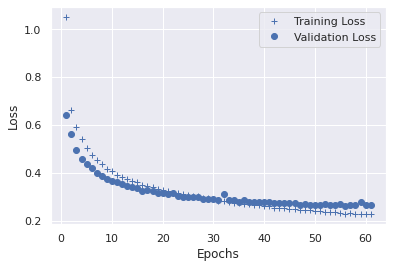

In [ ]:
epochs = range(1, len(cnn_history.history['loss'])+1)
training_loss = cnn_history.history['loss']
validation_loss = cnn_history.history['val_loss']


# b+ is for "blue cross"
plt.plot(epochs, training_loss, 'b+', label='Training Loss')
# "bo" is for "blue dot"
plt.plot(epochs, validation_loss, 'bo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

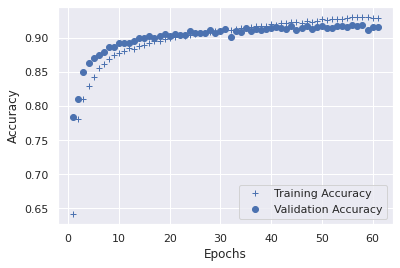

In [ ]:
epochs = range(1, len(cnn_history.history['loss'])+1)
training_acc = cnn_history.history['accuracy']
validation_acc = cnn_history.history['val_accuracy']


# b+ is for "blue cross"
plt.plot(epochs, training_acc, 'b+', label='Training Accuracy')
# "bo" is for "blue dot"
plt.plot(epochs, validation_acc, 'bo', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

###CNN with Transfer Learning

Doing a CNN with Transfer Learning in a dataset as simple as Fashion MNIST is something debatable. The images are smaller than the minimum input (32, 32) and they only have 1 channel (the pre-trained models from Keras require 3 channels).

I'm doing it purely of curiosity and I don't expect a huge jump of accuracy score. The reasons that led me to this pessimist set of mind:

1) The images will have to be upscaled to meet the size criteria. This can cause confusion in the model.

2) The models were trained in the ImageNet dataset, which has a huge amount of animals and objects and not so much clothes that are similar to Fashion MNIST's ones. For this reason, I'll only use the 2 first layers of the VGG16 model.

3) The number of parameters is far too big for a simple dataset as Fashion MNIST.

Nonetheless, I think it'll be a good experiment.

In [ ]:
# Reshapping image (taking off the channel dimension)
X_train_tfd = X_train.reshape(X_train.shape[0], 28, 28)
X_validation_tfd = X_validation.reshape(X_validation.shape[0], 28, 28)
X_test_tfd = X_test.reshape(X_test.shape[0], 28, 28)

In [ ]:
# Copying the values into the 2 new dimensions, so the final dataset is (num_samples, 28, 28, 3)
X_train_tfd = np.repeat((X_train_tfd / X_train_tfd.max()).astype("float32")[..., np.newaxis], 3, -1)
X_validation_tfd = np.repeat((X_validation_tfd / X_validation_tfd.max()).astype("float32")[..., np.newaxis], 3, -1)
X_test_tfd = np.repeat((X_test_tfd / X_test_tfd.max()).astype("float32")[..., np.newaxis], 3, -1)

In [ ]:
print(X_train_tfd.shape)
print(X_validation_tfd.shape)
print(X_test_tfd.shape)

(54000, 28, 28, 3)
(6000, 28, 28, 3)
(10000, 28, 28, 3)


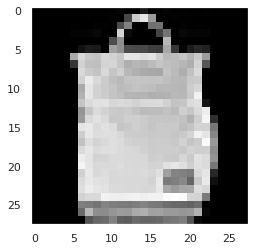

In [ ]:
# Sanity check to check it the images are still meaningful 
plt.imshow(X_train_tfd[2154])
plt.grid(False)

In [ ]:
input_image = keras.layers.Input(shape=(28, 28, 3)) # Creating an Input layer that will take the images created early

# This layer takes a image and resize it using the keras.backend.resize_images() function
resized_image = keras.layers.Lambda(lambda image: keras.backend.resize_images(x=image, height_factor=2, width_factor=2, data_format='channels_last'))(input_image)

# Importing the model. The top (DNN part) is not included
conv_base = VGG16(weights='imagenet', include_top=False, input_tensor=resized_image)

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        [(None, 28, 28, 3)]       0         
_________________________________________________________________
lambda_27 (Lambda)           (None, 56, 56, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 56, 56, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 56, 56, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 28, 28, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 28, 28, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 28, 28, 128)       147584

In [ ]:
# Because of the nature of the Fashion MNIST, I'll only use the 2 first blocks
conv_base = keras.models.Model(conv_base.input, conv_base.layers[7].output)
conv_base.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        [(None, 28, 28, 3)]       0         
_________________________________________________________________
lambda_27 (Lambda)           (None, 56, 56, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 56, 56, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 56, 56, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 28, 28, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 28, 28, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 28, 28, 128)       147

In [ ]:
# Creating a model

model_cnnTL = tf.keras.models.Sequential()  # creating a sequential model

model_cnnTL.add(conv_base)  # adding the base from VGG16

model_cnnTL.add(tf.keras.layers.Conv2D(64, (3,3), activation=keras.layers.ReLU()))  # creating the first convolutional layer
model_cnnTL.add(tf.keras.layers.MaxPooling2D(2, 2))

model_cnnTL.add(tf.keras.layers.Conv2D(64, (3,3), activation=keras.layers.ReLU()))  # creating the second convolutional layer
model_cnnTL.add(tf.keras.layers.MaxPooling2D(2, 2))

model_cnnTL.add(tf.keras.layers.Flatten())  # flattening the output from the last convolution

model_cnnTL.add(tf.keras.layers.Dropout(0.5))   # adding dropout

model_cnnTL.add(tf.keras.layers.Dense(64, activation=keras.layers.LeakyReLU())) # dense layer

model_cnnTL.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cnnTL.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_22 (Functional)        (None, 14, 14, 128)       260160    
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 12, 12, 64)        73792     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 256)               0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 256)             

In [ ]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model_cnnTL.trainable_weights))

# A important step is to set the conv to NOT be trained. Otherwhise all the weights will be lost 
conv_base.trainable = False

print('This is the number of trainable weights '
      'after freezing the conv base:', len(model_cnnTL.trainable_weights))

model_cnnTL.summary()

This is the number of trainable weights before freezing the conv base: 16
This is the number of trainable weights after freezing the conv base: 8
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_22 (Functional)        (None, 14, 14, 128)       260160    
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 12, 12, 64)        73792     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 256

In [ ]:
# same as before
loss_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model_cnnTL.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnnTL_history = model_cnnTL.fit(X_train_tfd, y_train, batch_size = 120, epochs=100, callbacks=loss_callback, validation_data=(X_validation_tfd, y_validation))

Epoch 1/100
450/450 [==============================] - 9s 18ms/step - loss: 2.0459 - accuracy: 0.5410 - val_loss: 0.4652 - val_accuracy: 0.8293
Epoch 2/100
450/450 [==============================] - 8s 18ms/step - loss: 0.5854 - accuracy: 0.7854 - val_loss: 0.3750 - val_accuracy: 0.8640
Epoch 3/100
450/450 [==============================] - 8s 18ms/step - loss: 0.4674 - accuracy: 0.8345 - val_loss: 0.3145 - val_accuracy: 0.8850
Epoch 4/100
450/450 [==============================] - 8s 18ms/step - loss: 0.4041 - accuracy: 0.8541 - val_loss: 0.2983 - val_accuracy: 0.8913
Epoch 5/100
450/450 [==============================] - 8s 18ms/step - loss: 0.3735 - accuracy: 0.8647 - val_loss: 0.2847 - val_accuracy: 0.8955
Epoch 6/100
450/450 [==============================] - 8s 18ms/step - loss: 0.3453 - accuracy: 0.8757 - val_loss: 0.2761 - val_accuracy: 0.8992
Epoch 7/100
450/450 [==============================] - 8s 18ms/step - loss: 0.3308 - accuracy: 0.8819 - val_loss: 0.2980 - val_accuracy:

> Fine-Tunning

The idea is to unfrozen the VGG16's second block, so it can learning new (hopefuly improved) weights from the Fashion MNIST dataset.

In [ ]:
# Sets all layers bellow "block2_conv1" as trainable

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block2_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
# Training again with a REALLY LOW learning rate. This is important to not wreck the weights learning previously.
loss_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)

model_cnnTL.compile(optimizer = tf.optimizers.Adam(learning_rate=1e-5),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnnTL_historyFT = model_cnnTL.fit(X_train_tfd, y_train, batch_size = 100, epochs=100, callbacks=loss_callback, validation_data=(X_validation_tfd, y_validation))

Epoch 1/100
540/540 [==============================] - 15s 27ms/step - loss: 0.1991 - accuracy: 0.9249 - val_loss: 0.2094 - val_accuracy: 0.9245
Epoch 2/100
540/540 [==============================] - 14s 27ms/step - loss: 0.1868 - accuracy: 0.9301 - val_loss: 0.2056 - val_accuracy: 0.9262
Epoch 3/100
540/540 [==============================] - 15s 27ms/step - loss: 0.1876 - accuracy: 0.9328 - val_loss: 0.2052 - val_accuracy: 0.9257
Epoch 4/100
540/540 [==============================] - 14s 27ms/step - loss: 0.1807 - accuracy: 0.9346 - val_loss: 0.2024 - val_accuracy: 0.9280
Epoch 5/100
540/540 [==============================] - 14s 26ms/step - loss: 0.1787 - accuracy: 0.9351 - val_loss: 0.2010 - val_accuracy: 0.9282
Epoch 6/100
540/540 [==============================] - 14s 26ms/step - loss: 0.1763 - accuracy: 0.9355 - val_loss: 0.2015 - val_accuracy: 0.9270
Epoch 7/100
540/540 [==============================] - 14s 27ms/step - loss: 0.1736 - accuracy: 0.9371 - val_loss: 0.2008 - val_ac

The validation accuracy improved from 0.9153 to 0.9323, while the loss decreased from 0.2362 to 0.1941.

Those are good values.

In [ ]:
cnnTL_stats = model_cnnTL.evaluate(X_test_tfd, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2082 - accuracy: 0.9279


In [ ]:
test_acc_cnnTL = cnnTL_stats[-1]
validation_acc_cnnTL = cnnTL_historyFT.history['val_accuracy'][-1]

dict_acc['CNN Transfer Learning'] = [validation_acc_cnnTL, test_acc_cnnTL]

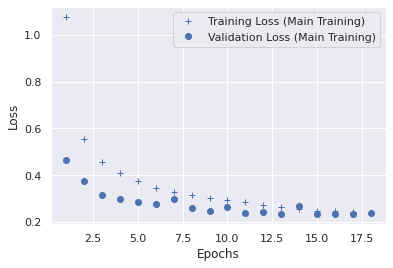

In [ ]:
epochs = range(1, len(cnnTL_history.history['loss'])+1)
training_loss = cnnTL_history.history['loss']
validation_loss = cnnTL_history.history['val_loss']


# b+ is for "blue cross"
plt.plot(epochs, training_loss, 'b+', label='Training Loss (Main Training)')
# "bo" is for "blue dot"
plt.plot(epochs, validation_loss, 'bo', label='Validation Loss (Main Training)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

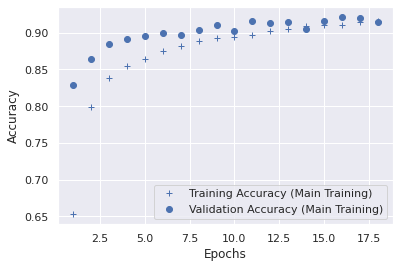

In [ ]:
epochs = range(1, len(cnnTL_history.history['loss'])+1)
training_acc = cnnTL_history.history['accuracy']
validation_acc = cnnTL_history.history['val_accuracy']


# b+ is for "blue cross"
plt.plot(epochs, training_acc, 'b+', label='Training Accuracy (Main Training)')
# "bo" is for "blue dot"
plt.plot(epochs, validation_acc, 'bo', label='Validation Accuracy (Main Training)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

>Pos fine-tune plots

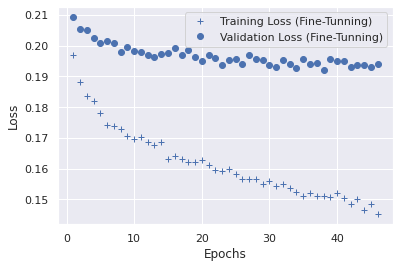

In [ ]:
epochs = range(1, len(cnnTL_historyFT.history['loss'])+1)
training_loss = cnnTL_historyFT.history['loss']
validation_loss = cnnTL_historyFT.history['val_loss']


# b+ is for "blue cross"
plt.plot(epochs, training_loss, 'b+', label='Training Loss (Fine-Tunning)')
# "bo" is for "blue dot"
plt.plot(epochs, validation_loss, 'bo', label='Validation Loss (Fine-Tunning)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

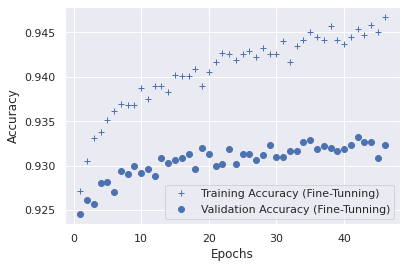

In [ ]:
epochs = range(1, len(cnnTL_historyFT.history['loss'])+1)
training_acc = cnnTL_historyFT.history['accuracy']
validation_acc = cnnTL_historyFT.history['val_accuracy']


# b+ is for "blue cross"
plt.plot(epochs, training_acc, 'b+', label='Training Accuracy (Fine-Tunning)')
# "bo" is for "blue dot"
plt.plot(epochs, validation_acc, 'bo', label='Validation Accuracy (Fine-Tunning)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

###Plotting

In [ ]:
dict_acc

{'CNN': [0.9120000004768372, 0.9120000004768372],
 'CNN Transfer Learning': [0.9323333501815796, 0.9279000163078308],
 'DNN': [0.8980000019073486, 0.883899986743927]}

In [ ]:
# creating a backup, just in case.
bkp_dct = dict_acc

In [ ]:
# creates a dataframe from the dict
df_acc = pd.DataFrame.from_dict(dict_acc)
df_acc = df_acc.transpose()
df_acc.columns = ['Acc Validation', 'Acc Test']
df_acc

,Acc Validation,Acc Test
CNN Transfer Learning,0.932333,0.9279
DNN,0.898000,0.8839
CNN,0.912000,0.9120


Bellow is the code to plot the comparison between the models in both validation and test datasets.

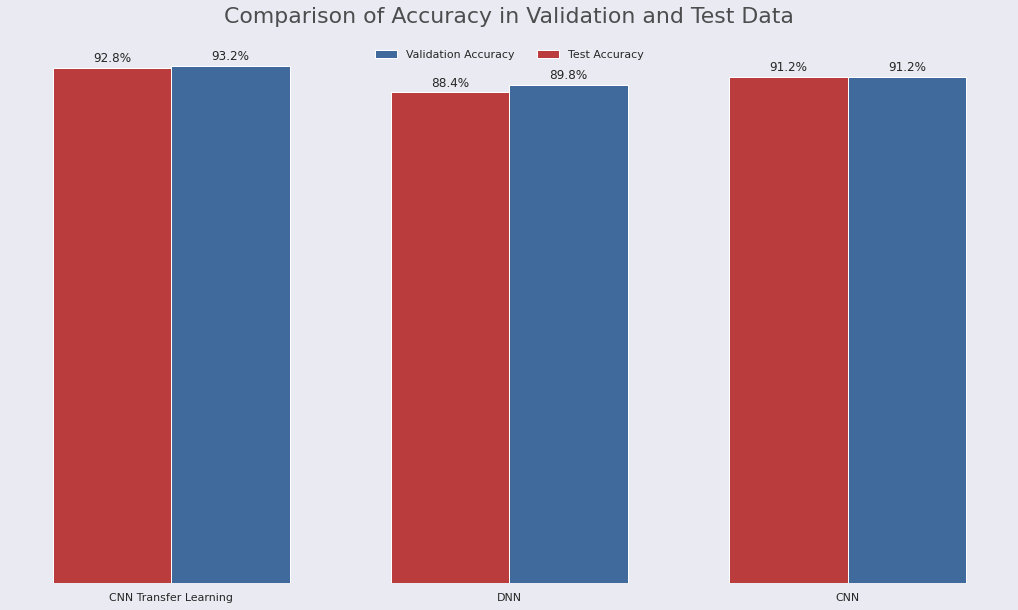

In [ ]:
fig = plt.figure(figsize=(18,10))   # changes the size of the image
fig.patch.set_facecolor('#eaeaf2')  # set the background color of the plot to match the seaborn theme

ax = plt.gca()
width = 0.35

rects1 = ax.bar(df_acc.index, df_acc['Acc Validation'], width,align='edge', color = '#40699c', label='Validation Accuracy')
rects2 = ax.bar(df_acc.index, df_acc['Acc Test'], -width, align='edge', color = '#ba3c3c', label='Test Accuracy')

for r1, r2 in zip(rects1.patches, rects2.patches):
    h1 = r1.get_height()
    h2 = r2.get_height()

    percent1 = h1*100
    percent2 = h2*100

    ax.annotate('{:.1f}%'.format(percent1),
                    xy=(r1.get_x() + r1.get_width() / 2, h1),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    ax.annotate('{:.1f}%'.format(percent2),
                    xy=(r2.get_x() + r2.get_width() / 2, h2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Rotate the X labels (models' names)

plt.box(False)  # disable the box around the plot
ax.grid(False)  # disable the grid
ax.set_yticks([])   # disable the y ticks

# creating a title
plt.title('Comparison of Accuracy in Validation and Test Data',
          size=22, alpha=0.8, y=1.02)

# add the legend (to display the horizontal lines' labels)
plt.legend(frameon=False, loc='upper center', ncol=2)

# saves the plot
plt.savefig("accuracy-comparison.png", bbox_inches='tight', dpi=300)
# displays the plot
plt.show();